In [12]:
include("framework.jl")
include("create.jl")
using JLD2
using PyPlot

mainPath=".."
configPath=mainPath*"/data/config"
outputPath=mainPath*"/data/output"
jlOutputPath=mainPath*"/data/julia"

"../data/julia"

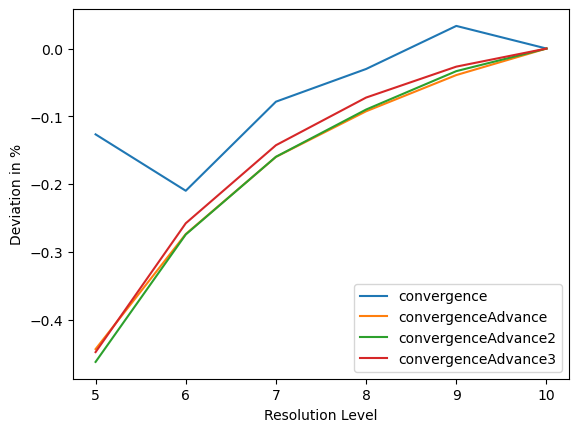

In [19]:
SimNames = [ "convergence", "convergenceAdvance", "convergenceAdvance2", "convergenceAdvance3" ]
fig = figure()

for simName in SimNames
    df = DataFrame()
    x = Float64[]; y = Float64[]; 
    for ind = 5:10
        try
            config, cap = read_data( outputPath, "$(simName)_$(ind)" )
            push!( x, ind )
            push!( y, getindex(cap, 4) )            
        catch
            continue
        end
    end

    y = ( y.- y[end] ) ./ y[end] .* 100

    plot( x, y, label=simName )
end

legend()
xlabel("Resolution Level")
ylabel("Deviation in %")

display(fig)

In [95]:
function process_files( outputPath, simName, index )
    x = Int[]
    y = Float64[]

    for file in readdir(outputPath, join=true)
        # Extract the index from the filename if it follows the pattern "$(simName)_$(index)"
        pattern = "^$(simName)_\\d+\\.log\$"
        my_regex = Regex(pattern)
        match = Base.match(my_regex, basename(file))
        if match !== nothing
            # ind = parse(Int, match.captures[1])
            # extract the index from the filename
            ind = parse(Int, split(split(basename(file), "_")[2], ".")[1])
            try
                config, cap = read_data(outputPath, "$(simName)_$(ind)")
                push!(x, ind)
                push!(y, getindex(cap, index))
            catch
                continue
            end
        end
    end

    return x, y
end

process_files (generic function with 1 method)

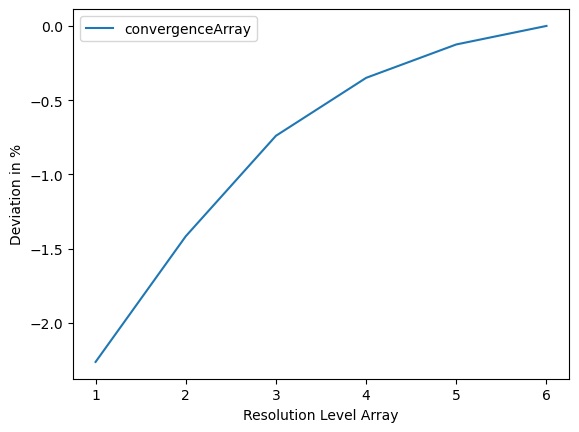

In [97]:
SimNames = [ "convergenceArray" ]
fig = figure()

for simName in SimNames
    df = DataFrame()

    x, y = process_files( outputPath, simName, 4 )

    y = ( y.- y[end] ) ./ y[end] .* 100

    plot( x, y, label=simName )
end

legend()
xlabel("Resolution Level Array")
ylabel("Deviation in %")

display(fig)

In [ ]:
for ()
./runMeshEnsemble.sh -m "$name" -c "$name" -M "2700"

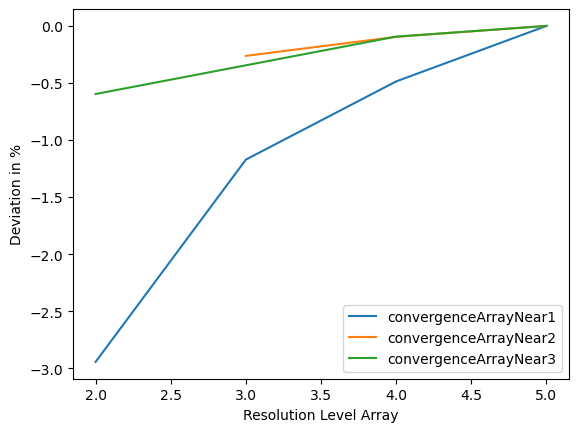

In [98]:
SimNames = [ "convergenceArrayNear$i" for i in 1:3 ]
fig = figure()

for simName in SimNames
    df = DataFrame()

    x, y = process_files( outputPath, simName, 4 )

    y = ( y.- y[end] ) ./ y[end] .* 100

    plot( x, y, label=simName )
end

legend()
xlabel("Resolution Level Array")
ylabel("Deviation in %")

display(fig)